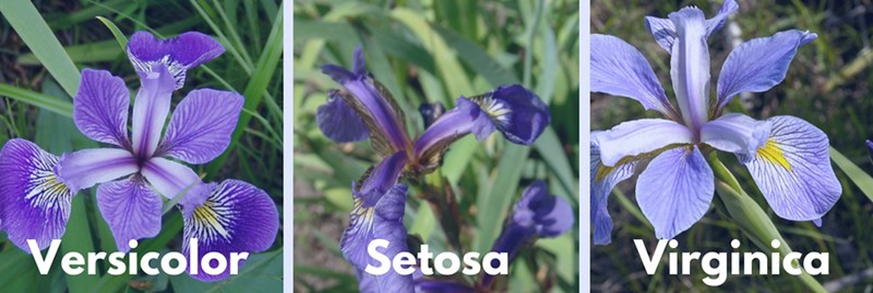

In [ ]:
#Librería de vectores
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Es la librería que selecciona los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Es la librería del modelo clasificación k vecinos
from sklearn.neighbors import KNeighborsClassifier

# Es la librería de métricas
from sklearn.metrics import classification_report, confusion_matrix

**Objetivo: Elabora un modelo de ML para clasificar las flores IRIS**

1.   Elaborar un estudio estadístico
2.   Elaborar diversos gráficos
3.   Elaborar el modelo (hecho )
4.   Evaluar el modelo (hecho)
5.   Producción el modelo (hecho)

In [ ]:
#Plantilla (modificar la plantilla)
df = pd.read_excel("Trabajo4.xlsx")
variablesX = ['petalo-l','sepalo-w']
etiquetaY = 'etiqueta'
test_porcentaje = 0.30
k_vecinos = 3

In [ ]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
         sepalo-l    sepalo-w    petalo-l    petalo-w    etiqueta
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667    2.000000
std      0.828066    0.433594    1.764420    0.763161    0.819232
min      4.300000    2.000000    1.000000    0.100000    1.000000
25%      5.100000    2.800000    1.600000    0.300000    1.000000
50%      5.800000    3.000000    4.350000    1.300000    2.000000
75%      6.400000    3.300000    5.100000    1.800000    3.000000
max      7.900000    4.400000    6.900000    2.500000    3.000000


In [ ]:
# Conteo de las muestras por clase (especie de flor)
print("\nConteo por clases:")
print(df['etiqueta'].value_counts())


Conteo por clases:
etiqueta
1    50
2    50
3    50
Name: count, dtype: int64


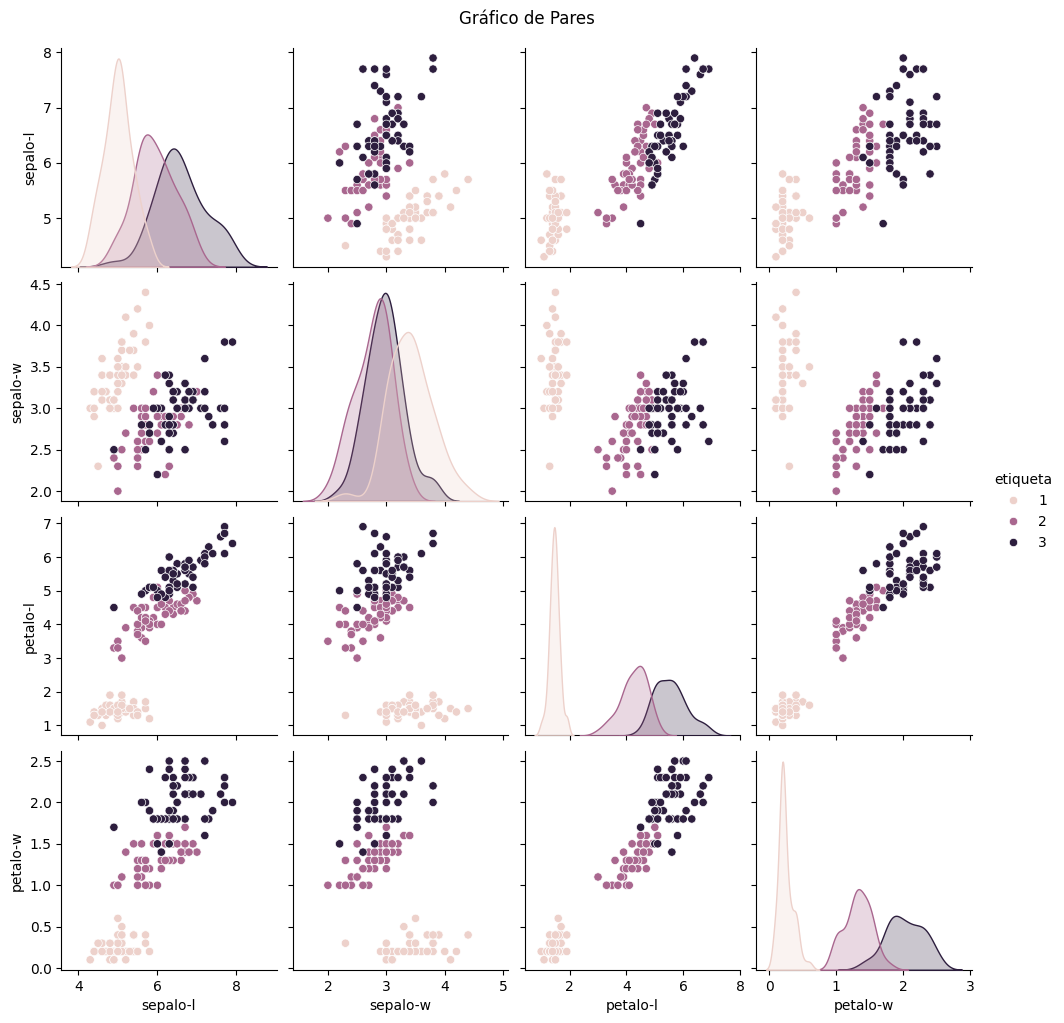

In [ ]:
# Gráfico de pares (pairplot)
sns.pairplot(df, hue='etiqueta')
plt.suptitle("Gráfico de Pares", y=1.02)
plt.show()

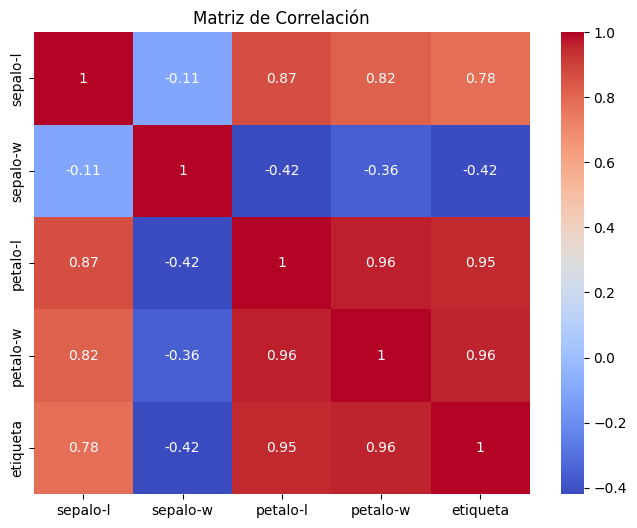

In [ ]:
# Mapa de calor de la correlación entre características
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

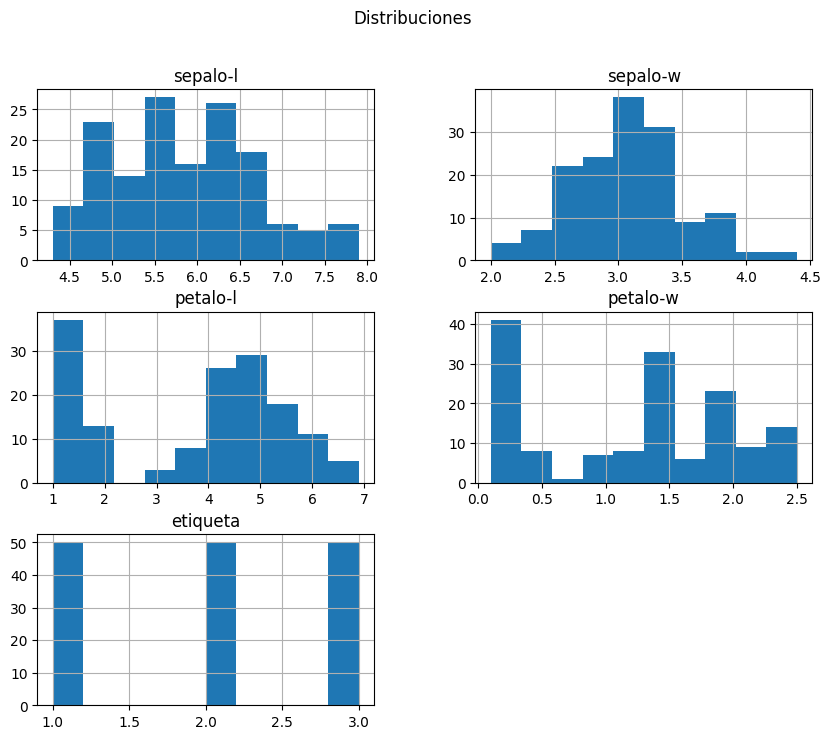

In [ ]:
# Histograma de las características
df.hist(figsize=(10, 8))
plt.suptitle("Distribuciones")
plt.show()

In [ ]:
import plotly.express as px

# Histograma de varias características
fig = px.histogram(df, x="petalo-l", color="etiqueta", title="Distribución de Longitud del Pétalo",
                   labels={'petalo-l': 'Longitud del Pétalo'}, nbins=30, opacity=0.7)
fig.update_layout(bargap=0.2)
fig.show()

# Puedes repetir este código para otras características como 'sepalo-l', 'sepalo-w', etc.


In [ ]:
# Gráfico de dispersión entre 'petalo-l' y 'sepalo-w'
fig = px.scatter(df, x='petalo-l', y='sepalo-w', color='etiqueta',
                 title="Gráfico de Dispersión entre Petalo-l y Sepalo-w",
                 labels={'petalo-l': 'Longitud del Pétalo', 'sepalo-w': 'Ancho del Sépalo'},
                 color_continuous_scale='Viridis', opacity=0.6)

# Mejoras visuales
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig.show()


In [ ]:
import plotly.graph_objects as go

# Gráfico de Cajas para las características
fig = go.Figure()

# Petalo-l
fig.add_trace(go.Box(y=df['petalo-l'], boxmean='sd', name='Petalo-l',
                     marker_color='indianred'))

# Sepalo-w
fig.add_trace(go.Box(y=df['sepalo-w'], boxmean='sd', name='Sepalo-w',
                     marker_color='royalblue'))

fig.update_layout(title="Distribución de Características por Boxplot",
                  yaxis_title="Valor", xaxis_title="Características")
fig.show()


In [ ]:
# Seleccionar solo las columnas numéricas
numeric_df = df[['sepalo-l', 'sepalo-w', 'petalo-l', 'petalo-w']]

# Calcular la matriz de correlación solo con las columnas numéricas
corr = numeric_df.corr()

# Crear el mapa de calor con Plotly
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(z=corr.values, x=list(corr.columns), y=list(corr.columns),
                                  colorscale='RdBu', showscale=True,
                                  colorbar_title="Correlación")
fig.update_layout(title="Matriz de Correlación entre Variables",
                  xaxis_title="Características", yaxis_title="Características")
fig.show()


In [ ]:
import plotly.express as px

melted_df = df.melt(

    id_vars=['tipo'],

    value_vars=['sepalo-l', 'sepalo-w', 'petalo-l', 'petalo-w'],

    var_name='Medida',

    value_name='Valor'

)



fig = px.box(

    melted_df,

    x='tipo',

    y='Valor',

    color='tipo',

    facet_col='Medida',

    title='Distribución de medidas del sépalo y pétalo por tipo de flor',

    labels={'tipo': 'Tipo de flor', 'Valor': 'Valor (cm)'}

)

fig.update_layout(showlegend=False)

fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))

fig.show()

In [ ]:
# Gráfico de Pares para todas las características
fig = px.scatter_matrix(df, dimensions=['petalo-l', 'petalo-w', 'sepalo-l', 'sepalo-w'],
                        color='etiqueta', title="Gráfico de Pares por Especie",
                        labels={'petalo-l': 'Longitud del Pétalo', 'petalo-w': 'Ancho del Pétalo',
                                'sepalo-l': 'Longitud del Sépalo', 'sepalo-w': 'Ancho del Sépalo'})

# Mejoras visuales
fig.update_layout(width=800, height=800, showlegend=True)
fig.show()


In [ ]:
# prompt: graficos recomendados usando plotly

# Gráfico de dispersión 3D
fig = px.scatter_3d(df, x='petalo-l', y='sepalo-w', z='sepalo-l', color='etiqueta',
                    title="Gráfico de Dispersión 3D",
                    labels={'petalo-l': 'Longitud del Pétalo', 'sepalo-w': 'Ancho del Sépalo', 'sepalo-l': 'Longitud del Sépalo'})
fig.show()


# Gráfico de violín
fig = px.violin(df, y="petalo-l", x="etiqueta", color="etiqueta", box=True, points="all",
                title="Distribución de Longitud del Pétalo por Etiqueta")
fig.show()

# FacetGrid con histogramas
fig = px.histogram(df, x="petalo-l", color="etiqueta", facet_col="etiqueta",
                   title="Histograma de Longitud de Pétalo por Etiqueta")
fig.show()

# Sunburst chart
fig = px.sunburst(df, path=['etiqueta', 'petalo-l'], values='sepalo-w',
                  title='Sunburst chart')
fig.show()

# Treemap
fig = px.treemap(df, path=[px.Constant("all"), 'etiqueta', 'petalo-l'], values='sepalo-w',
                  color='sepalo-w', hover_data=['sepalo-l'],
                  color_continuous_scale='RdBu',
                  title="Treemap")
fig.show()


In [ ]:
# Gráfico de dispersión 3D
fig = px.scatter_3d(df, x='petalo-l', y='sepalo-w', z='sepalo-l', color='etiqueta',
                    title="Gráfico de Dispersión 3D",
                    labels={'petalo-l': 'Longitud del Pétalo', 'sepalo-w': 'Ancho del Sépalo', 'sepalo-l': 'Longitud del Sépalo'})
fig.show()

In [ ]:
# Gráfico de violín
fig = px.violin(df, y="petalo-l", x="etiqueta", color="etiqueta", box=True, points="all",
                title="Distribución de Longitud del Pétalo por Etiqueta")
fig.show()

In [ ]:
# FacetGrid con histogramas
fig = px.histogram(df, x="petalo-l", color="etiqueta", facet_col="etiqueta",
                   title="Histograma de Longitud de Pétalo por Etiqueta")
fig.show()

In [ ]:
# Sunburst chart
fig = px.sunburst(df, path=['etiqueta', 'petalo-l'], values='sepalo-w',
                  title='Sunburst chart')
fig.show()

In [ ]:
# Treemap
fig = px.treemap(df, path=[px.Constant("all"), 'etiqueta', 'petalo-l'], values='sepalo-w',
                  color='sepalo-w', hover_data=['sepalo-l'],
                  color_continuous_scale='RdBu',
                  title="Treemap")
fig.show()

In [ ]:
import plotly.express as px

melted_df = df.melt(

    id_vars=['tipo'],

    value_vars=['sepalo-l', 'sepalo-w', 'petalo-l', 'petalo-w'],

    var_name='Medida',

    value_name='Valor'

)



fig = px.box(

    melted_df,

    x='tipo',

    y='Valor',

    color='tipo',

    facet_col='Medida',

    title='Distribución de medidas del sépalo y pétalo por tipo de flor',

    labels={'tipo': 'Tipo de flor', 'Valor': 'Valor (cm)'}

)

fig.update_layout(showlegend=False)

fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))

fig.show()

In [ ]:
#1 Datos
X = df[variablesX]
y = df[etiquetaY]
#2 Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_porcentaje, random_state=42)
modelo = KNeighborsClassifier(n_neighbors=k_vecinos)
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Reporte de classification:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.92      0.92      0.92        13
           3       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



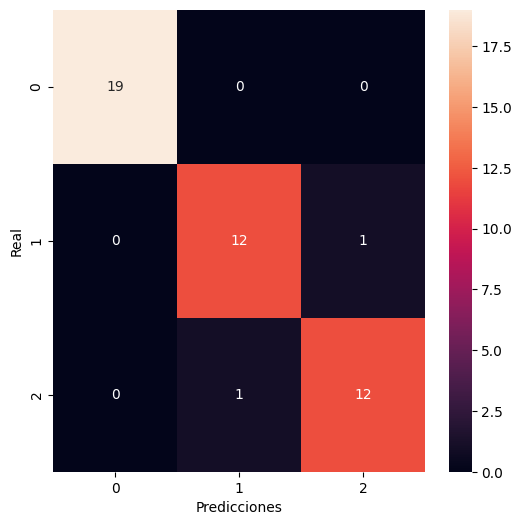

In [ ]:
#3 Evaluación
y_pred = modelo.predict(X_test)
print("Reporte de classification:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicciones')
plt.ylabel('Real')
plt.show()

In [ ]:
#Producción (cuidado con la etiqueta 1==setosa,2==versicolor,3==virginica)
#varibales para nuevos datos
nuevos_datos = pd.DataFrame({'petalo-l':[1.3],'sepalo-w':[0.5]})
prediccion = modelo.predict(nuevos_datos)
print("Predicción:", prediccion)
if prediccion == 1:
    print("setosa")
elif prediccion ==2:
    print("versicolor")
else:
    print("virginica")

Predicción: [1]
setosa


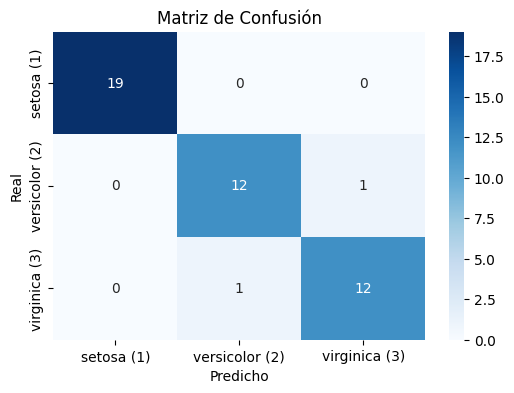

Reporte de Clasificación:
                precision    recall  f1-score   support

    setosa (1)       1.00      1.00      1.00        19
versicolor (2)       0.92      0.92      0.92        13
 virginica (3)       0.92      0.92      0.92        13

      accuracy                           0.96        45
     macro avg       0.95      0.95      0.95        45
  weighted avg       0.96      0.96      0.96        45

Matthews Correlation Coefficient (MCC): 0.932
G-mean: 0.948


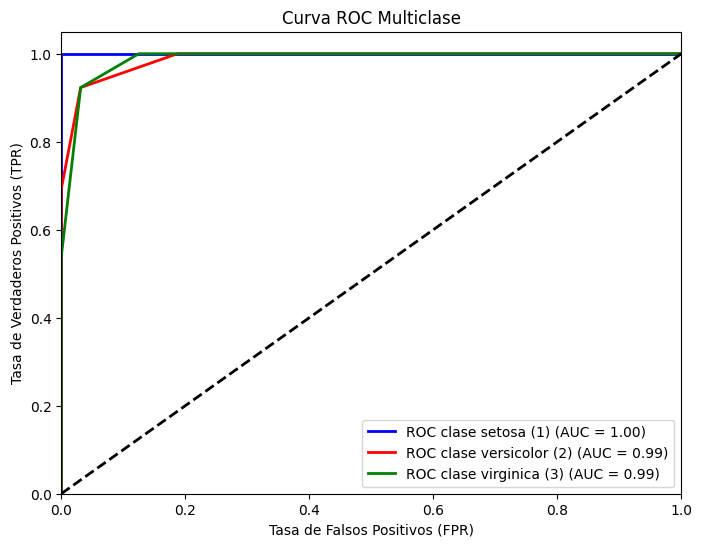

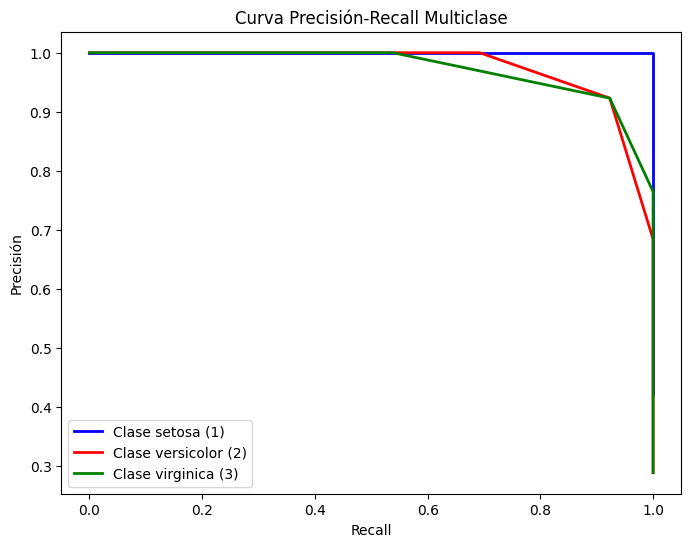

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, matthews_corrcoef, recall_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 1. Cargar los datos
df = pd.read_excel("Trabajo4.xlsx")
variablesX = ['petalo-l', 'sepalo-w']
etiquetaY = 'etiqueta'
test_porcentaje = 0.30
k_vecinos = 3

X = df[variablesX]
y = df[etiquetaY]

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_porcentaje, random_state=42)

# 3. Entrenar el modelo KNN
modelo = KNeighborsClassifier(n_neighbors=k_vecinos)
modelo.fit(X_train, y_train)

# 4. Hacer predicciones
y_pred = modelo.predict(X_test)
y_scores = modelo.predict_proba(X_test)  # Probabilidades para ROC y precisión-recall

# 5. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa (1)', 'versicolor (2)', 'virginica (3)'], yticklabels=['setosa (1)', 'versicolor (2)', 'virginica (3)'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# 6. Reporte de clasificación (precisión, recall, F1-score, soporte)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['setosa (1)', 'versicolor (2)', 'virginica (3)']))

# 7. Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.3f}")

# 8. G-mean (usando recall por clase)
recalls = recall_score(y_test, y_pred, average=None)
g_mean = np.prod(recalls) ** (1/len(recalls))
print(f"G-mean: {g_mean:.3f}")

# 9. Curva ROC y AUC (multiclase)
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = cycle(['blue', 'red', 'green'])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC clase {["setosa (1)", "versicolor (2)", "virginica (3)"][i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Multiclase')
plt.legend(loc="lower right")
plt.show()

# 10. Curva Precisión-Recall (multiclase)
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Clase {["setosa (1)", "versicolor (2)", "virginica (3)"][i]}')

plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall Multiclase')
plt.legend(loc="lower left")
plt.show()

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


ROC-AUC Score (OvR): 1.0000


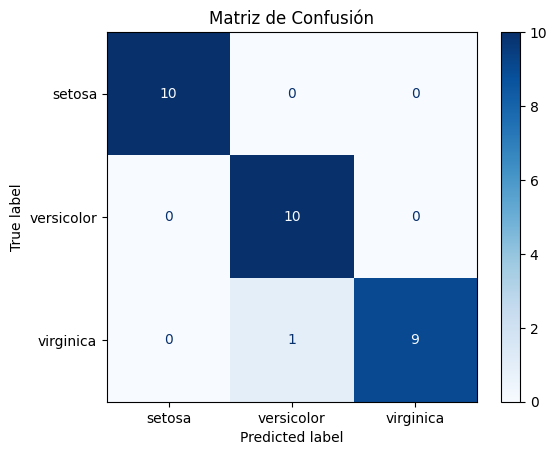

In [ ]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, roc_auc_score

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import label_binarize



# Cargar los datos (usando el DataFrame de ejemplos anteriores)

df = pd.read_excel("Trabajo4.xlsx")



# Separar características y target

X = df[['sepalo-l', 'sepalo-w', 'petalo-l', 'petalo-w']]

y = df['tipo']



# Binarizar las etiquetas para ROC-AUC multiclase

y_bin = label_binarize(y, classes=['setosa', 'versicolor', 'virginica'])



# Dividir en entrenamiento y prueba (80-20)

X_train, X_test, y_train, y_test, y_train_bin, y_test_bin = train_test_split(

    X, y, y_bin, test_size=0.2, random_state=42, stratify=y

)



# Crear pipeline con escalado y modelo k-NN

model = make_pipeline(

    StandardScaler(),

    KNeighborsClassifier(n_neighbors=5, weights='distance')

)



# Entrenar modelo

model.fit(X_train, y_train)



# Predicciones

y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)



# Métricas

print("Classification Report:")

print(classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica']))



# ROC-AUC (One-vs-Rest)

roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')

print(f"\nROC-AUC Score (OvR): {roc_auc:.4f}")



# Matriz de confusión (opcional)

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay



ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

plt.title('Matriz de Confusión')

plt.show()